(2001, 4)
(2, 1300) (2, 701) (1, 1300) (1, 701)


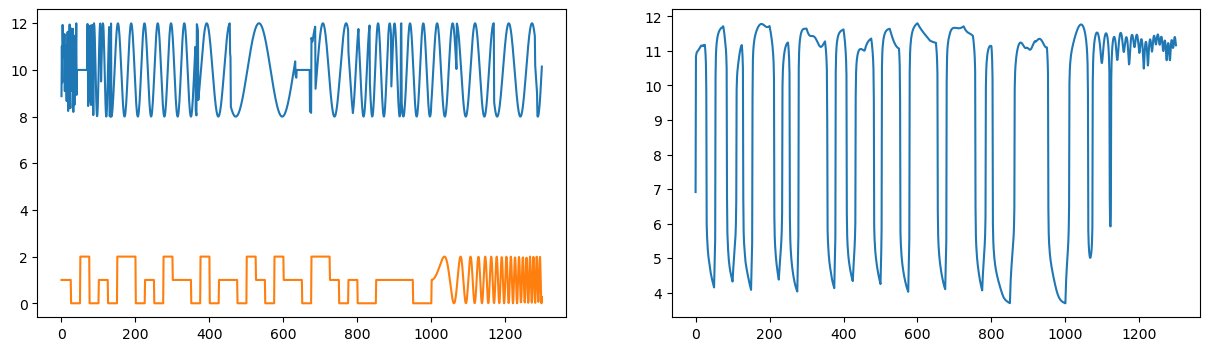

In [53]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy.io as sc 
from sympy import symbols, pprint
import matplotlib.pyplot as plt
from structureSelector import *
from methods.utils.utilities import *

def metrics(y, yest):
    residuo1 = y - yest
    mape = round(np.mean(np.abs(residuo1 / (yest + np.finfo(np.float64).eps))) * 100, 3)
    print('MSE:', np.mean(np.square(residuo1)), '\nAET:', np.sum(np.abs(residuo1)), '\nMAPE:', str(mape) + '%')
    cc = np.corrcoef(y, yest)
    #print("Correlation pearson:", np.mean(cc))

phData  = np.loadtxt('data/pHdata.dat')
print(phData.shape)
t = phData[:,0]
u1 = phData[:,1]
u2 = phData[:,2]

part = 1300
u = phData[:part,1:3]
uVal = phData[part:,1:3].T  
y = phData[:part,3].reshape((1,-1))
yVal = phData[part:,3].reshape((1,-1))


#u = phData[:part,2].reshape((1, -1))
u = u.T
#y = y.reshape((1,-1))
print(u.shape, uVal.shape, y.shape, yVal.shape)
f, ax = plt.subplots(1,2, figsize=[15,4])
ax[0].plot(u.T)
ax[1].plot(y.T)
plt.show()


In [58]:
#Selecione o tanque 
output = 0  # 0 ou 1
Ts = 10

num = [8, 5]
params = []
#params.append({'nb':[1],'na':[5], 'level':3, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':2, 'diff':False})
#params.append({'nb':[1],'na':[5], 'level':3, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':2, 'diff':False})
params.append({'nb':[1],'na':[5,5], 'level':3, 'nonlinear':[0,0,0,0,0], 'root':False, 'delay':2, 'diff':False})


sselector = structureSelector()
ss = sselector.symbolic_regressors(**params[output])
#print(ss)

vCandidatos = sselector.matrix_candidate(u, y, **params[output], dt=Ts)

pad = max(max(params[output]['nb']), max(params[output]['na']))
psi, selected  = sselector.semp(vCandidatos.T, y[output, pad:], num[output], 0.000001)
model = ss[selected]
#print(model, selected)
theta = LSM(y[output, pad:], psi)

print(model, theta)

slivre = sselector.predict(u, y, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], params[output]['diff'], dt=0.1)
yhat = sselector.oneStepForward(u, y, theta, ss[selected], params[output]['nb'], params[output]['na'], output, diff=params[output]['diff'], dt=Ts)

print("\nSimulação livre")
metrics(y, slivre)
print("\nUm passo a frente")
metrics(y, yhat)

[Y1.1 U2.3*Y1.1**2 U2.4*Y1.1 U2.3*Y1.1 U2.4*Y1.1**2 U2.3**2*Y1.1] [ 0.96067811 -0.06338278 -0.49344087  0.78016879  0.04245677 -0.01251193]
Simulação livre
--------s:  [Y1.1, U1.2, U1.3, U1.4, U1.5, U2.2, U2.3, U2.4, U2.5]

Simulação livre
MSE: 1.4450908400033549 
AET: 927.1323784082068 
MAPE: 10.999%

Um passo a frente
MSE: 0.2341826844851429 
AET: 238.83944847837262 
MAPE: 2.577%


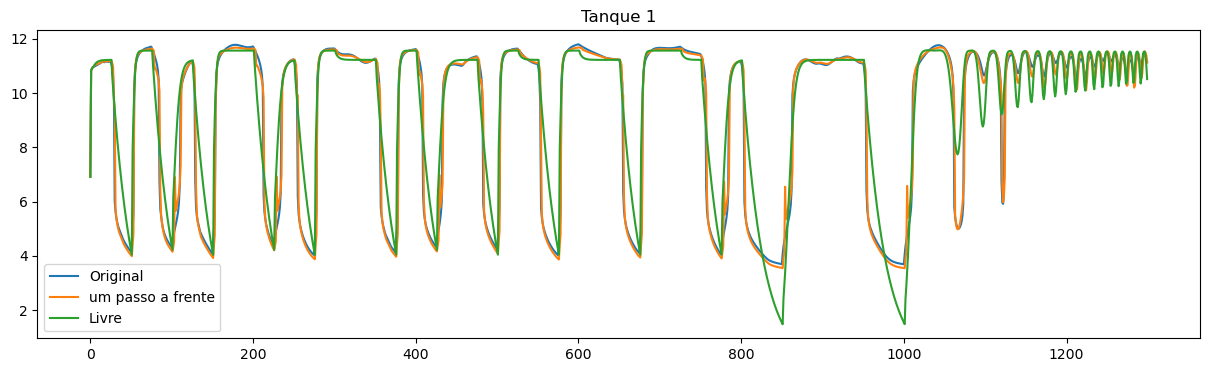

In [59]:
plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(y[output].T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

## Validação

Simulação livre
--------s:  [Y1.1, U1.2, U1.3, U1.4, U1.5, U2.2, U2.3, U2.4, U2.5]
MAPE LIVRE: 2.5688%
MAPE LIVRE: 2.5481%


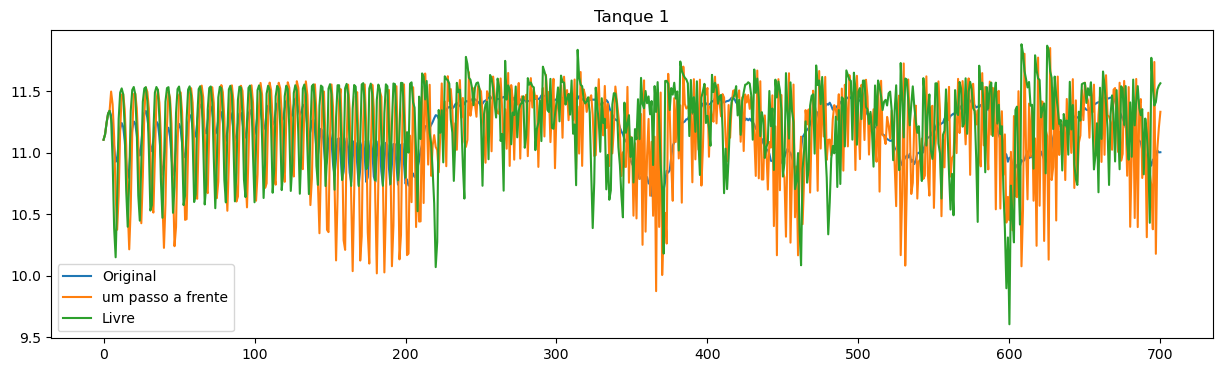

In [60]:
## Validação
slivre = sselector.predict(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, params[output]['delay'], diff=params[output]['diff'], dt=0.1)
yhat = sselector.oneStepForward(uVal, yVal, theta, ss[selected], params[output]['nb'], params[output]['na'], output, diff=params[output]['delay'], dt=Ts)

rs = yVal - slivre
rh = yVal - yhat

print('MAPE LIVRE:', str(round((np.mean(np.abs(rs)/np.mean(yVal))) * 100, 4)) + '%')
print('MAPE LIVRE:', str(round((np.mean(np.abs(rh)/np.mean(yVal))) * 100, 4)) + '%')

plt.figure(figsize=(15,4))
plt.title("Tanque " + str(output+1))
plt.plot(yVal.T, label='Original')
plt.plot(yhat, label='um passo a frente')
plt.plot(slivre, label='Livre')
plt.legend()
plt.show()

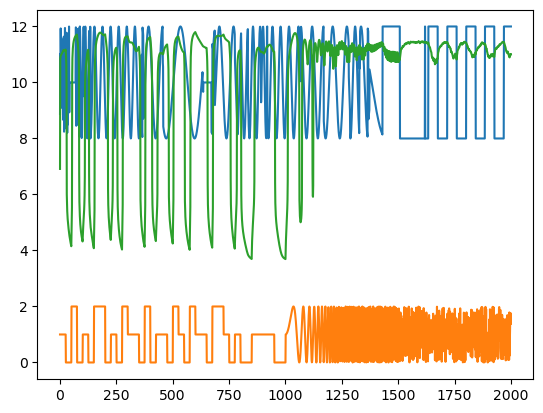

In [46]:
plt.plot(phData[:,1:])